In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

table = pd.read_csv("Position_Salaries.csv")
X = table['Level'].values.reshape(-1,1)
y = table['Salary'].values.reshape(-1,1)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X = sc_x.fit_transform(X)
sc_y = StandardScaler()
y = sc_y.fit_transform(y)


In [80]:
# Model using SVM
# and using inverse scaling to get the values back previous value

from sklearn.svm import SVR
model = SVR(kernel = "rbf")
model.fit(X,y)
pred = sc_y.inverse_transform(model.predict(X))


C:\Users\amanj\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


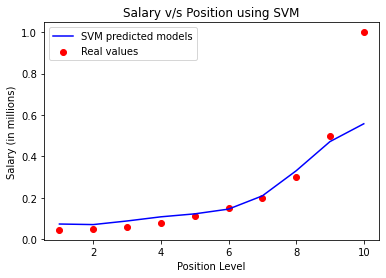

In [81]:
#Plotting results

plt.plot(sc_x.inverse_transform(X),pred/1000000, color = "blue", label = "SVM predicted models")
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(y)/1000000, color = "red", label = "Real values")
plt.xlabel("Position Level")
plt.ylabel("Salary (in millions)")
plt.title("Salary v/s Position using SVM")
plt.legend()